## Import Libraries

In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

## Parameters

In [2]:
#Parameters

#atmosphere
g = 9.81 #gravity
density = 1.091 # avg density of air

#rocket
ms = 50 #rocket weight (kg)
R = 0.5 #max cross-sectional radius of rocket in meters
A = math.pi*(R)**2 # max xA of rocket (m^2)
C_D = 0.15 #drag coeff
v_e = 325 #exhaust velocity (m/s)
m_pi = 100 #initial mass of proppelant (kg)

#Flight Parameters
T = 38 #terminal time in seconds

Q1 = 20 #rate of propellant consumption when 0.ge.t.lt.5
Q2 = 0 #rate of propellant consumption when 5.gt.t.le.10

#Initial conditions
v_0 = 0.0
h_0 = 0.0

In [3]:
#Grid

dt = 0.1 #time step
N = int(T/dt) + 1   # number of time-steps
t = numpy.linspace(0, T, N) # time discretization

## Solve with EULER'S METHOD

In [4]:
def f(u, Q, t_c):
    
    """
    Returns the right-hand side 
    Use when t from zero to less than or equal to 5 seconds
    
    Parameters:
    u[0] = h
    u[1] = v
    v = velocity of rocket
    Q = propellant burn rate
    t_c = current time
    """
    
    #h = u[0]
    v = u[1]
    mp = m_pi - Q*t_c
    
    return numpy.array([v, 
                        (v_e*Q - (ms+mp)*g - 0.5*density*v*abs(v)*A*C_D)/(ms+mp)])

In [5]:
def f2(u, Q):
    
    """
    Returns the right-hand side 
    
    Parameters:
    v = velocity of rocket
    Q = propellant burn rate
    t_c = current time
    """
    
    #h = u[0]
    v = u[1]
    mp = 0  #mass of remaining propellant
    
    return numpy.array([v, 
                        (v_e*Q - (ms+mp)*g - 0.5*density*v*abs(v)*A*C_D)/(ms+mp)])

In [6]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f

In [7]:
#Initialize Solution

u = numpy.empty((N,2))
u[0] = numpy.array([h_0, v_0])

In [8]:
# Time Loop

for i in range(N-1):
    

    if (t[i] < 5):
        F = f(u[i], Q1, t[i])
        #print(F)
        u[i+1] = euler_step(u[i], F, dt)
        
    if (t[i] >= 5):
        F = f2(u[i], Q2)
        u[i+1] = euler_step(u[i], F, dt)
        

In [9]:
#print(u)

In [10]:
h = u[:,0]

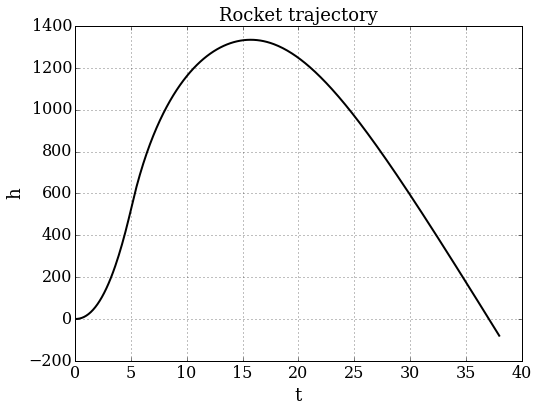

In [11]:
# visualization of the path 
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'h', fontsize=18)
pyplot.title('Rocket trajectory', fontsize=18)
pyplot.plot(t,h, 'k-', lw=2);

In [12]:
v = u[:,1]

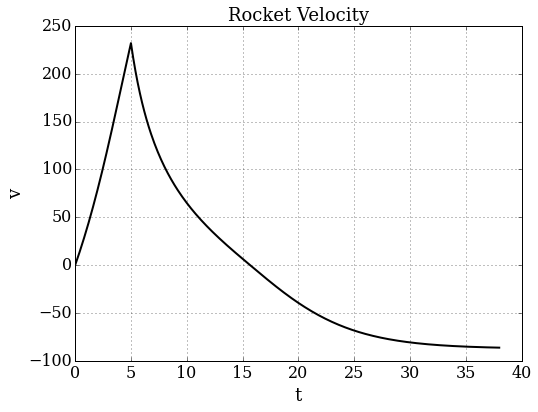

In [13]:
# visualization of the speed
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'v', fontsize=18)
pyplot.title('Rocket Velocity', fontsize=18)
pyplot.plot(t,v, 'k-', lw=2);

### Maximum Velocity, Corresponding time and altitude

In [14]:
print(max(v))

232.106133413


In [15]:
numpy.where(v==max(v))

(array([50]),)

In [16]:
print('t = ',numpy.round(t[50],2),', h = ' ,numpy.round(h[50],2),', v = ', numpy.round(v[50],2))

t =  5.0 , h =  523.52 , v =  232.11


### Maxiumum Height

In [17]:
print('h = ', numpy.round(max(h),2))

h =  1334.18


In [18]:
numpy.where(h==max(h))

(array([157]),)

In [19]:
print('t = ',numpy.round(t[157],2),', h = ' ,numpy.round(h[157],2),', v = ', numpy.round(v[157],2))

t =  15.7 , h =  1334.18 , v =  -0.22


### Impact

In [20]:
TOL = 0.001

In [21]:
numpy.where(h<0)

(array([371, 372, 373, 374, 375, 376, 377, 378, 379, 380]),)

In [22]:
print(h[370], h[371])

6.13901004188 -2.45858130616


In [23]:
print(t[370], t[371])

37.0 37.1


In [24]:
print(v[370], v[370])

-85.9759134804 -85.9759134804
